In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_rome_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Rome')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/rome_{date}.csv',index=False)
get_listings_rome_timeseries()

In [4]:
# pull in detailed_listings
raw_df_rome = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_rome)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(rome_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 25489 AirBnb listings.


In [5]:
rome_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2020-12.csv')
rome_raw_df_12_12_2020.shape





(28151, 16)

In [6]:
# use magic commands 'cd' to change directory
# use glob to locate all files for rome
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_rome = glob.glob('rome/**.csv')
files_rome

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['rome/Rome_2021-01.csv',
 'rome/Rome_2021-02.csv',
 'rome/Rome_2021-03.csv',
 'rome/Rome_2021-07.csv',
 'rome/Rome_2021-06.csv',
 'rome/Rome_2021-04.csv',
 'rome/Rome_2021-10.csv',
 'rome/Rome_2021-08.csv',
 'rome/Rome_2021-09.csv',
 'rome/Rome_2020-12.csv']

In [7]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

rome_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(rome_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(rome_raw_df_12_12_2020['price'].mean(),2)}.")

rome_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(rome_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_1_9_2021['price'].mean(),2)}.")

rome_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(rome_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_2_8_2021['price'].mean(),2)}.")

rome_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(rome_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_3_4_2021['price'].mean(),2)}.")

rome_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(rome_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_4_9_2021['price'].mean(),2)}.")

#rome_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(rome_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_5_19_2021['price'].mean(),2)}.")

rome_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(rome_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_6_3_2021['price'].mean(),2)}.")

rome_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(rome_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_7_4_2021['price'].mean(),2)}.")

rome_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(rome_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_8_6_2021['price'].mean(),2)}.")

rome_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(rome_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_9_7_2021['price'].mean(),2)}.")

rome_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(rome_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_10_6_2021['price'].mean(),2)}.")

#rome_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(rome_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 28151 AirBnb listings; the avg price is €108.71.
The 1_9_2021 dataset contains 28024 AirBnb listings; the avg price is €105.14.
The 2_8_2021 dataset contains 27647 AirBnb listings; the avg price is €105.11.
The 3_4_2021 dataset contains 27433 AirBnb listings; the avg price is €109.61.
The 4_9_2021 dataset contains 27518 AirBnb listings; the avg price is €113.53.
The 6_3_2021 dataset contains 27126 AirBnb listings; the avg price is €116.16.
The 7_4_2021 dataset contains 27213 AirBnb listings; the avg price is €120.82.
The 8_6_2021 dataset contains 26877 AirBnb listings; the avg price is €122.9.
The 9_7_2021 dataset contains 26098 AirBnb listings; the avg price is €123.84.
The 10_6_2021 dataset contains 25490 AirBnb listings; the avg price is €127.01.


In [8]:
df_list_rome = [rome_raw_df_12_12_2020, rome_raw_df_1_9_2021, rome_raw_df_2_8_2021,
           rome_raw_df_3_4_2021, rome_raw_df_4_9_2021, rome_raw_df_6_3_2021, rome_raw_df_7_4_2021,
           rome_raw_df_8_6_2021, rome_raw_df_9_7_2021, rome_raw_df_10_6_2021]

dates_rome = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_rome = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_rome = []

def airbnb_parse_rome(df_list, files):
    for file in files_rome:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/rome/rome_{file}.csv")
        print(f"The {file} rome dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_rome(df_list, dates):
    for file in files_rome:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/rome/rome_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_rome.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_rome)

rome_parse = airbnb_parse_rome(df_list_rome, files_rome)


The 2020-12 rome dataset contains 28151 AirBnb listings -- the avg price is €108.71.
The 2021-01 rome dataset contains 28024 AirBnb listings -- the avg price is €105.14.
The 2021-02 rome dataset contains 27647 AirBnb listings -- the avg price is €105.11.
The 2021-03 rome dataset contains 27433 AirBnb listings -- the avg price is €109.61.
The 2021-04 rome dataset contains 27518 AirBnb listings -- the avg price is €113.53.
The 2021-06 rome dataset contains 27126 AirBnb listings -- the avg price is €116.16.
The 2021-07 rome dataset contains 27213 AirBnb listings -- the avg price is €120.82.
The 2021-08 rome dataset contains 26877 AirBnb listings -- the avg price is €122.9.
The 2021-09 rome dataset contains 26098 AirBnb listings -- the avg price is €123.84.
The 2021-10 rome dataset contains 25490 AirBnb listings -- the avg price is €127.01.


In [9]:
rome_summary = airbnb_to_frame_rome(df_list_rome, files_rome)
rome_summary['Date of scrape'] = pd.to_datetime(rome_summary['Date of scrape'])
rome_summary['City'] = 'Rome'
rome_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,28151,108.71,70.0,0,10571,1.15,Rome
1,2021-01-01,28024,105.14,65.0,0,10571,1.12,Rome
2,2021-02-01,27647,105.11,65.0,0,10571,1.09,Rome
3,2021-03-01,27433,109.61,69.0,0,10571,1.07,Rome
4,2021-04-01,27518,113.53,70.0,0,10571,1.03,Rome
5,2021-06-01,27126,116.16,73.0,0,10571,1.04,Rome
6,2021-07-01,27213,120.82,75.0,0,10571,1.06,Rome
7,2021-08-01,26877,122.90,75.0,0,10571,1.13,Rome
8,2021-09-01,26098,123.84,79.0,0,15400,1.18,Rome
9,2021-10-01,25490,127.01,80.0,0,11111,1.23,Rome


In [10]:
master_df_rome = pd.concat(df_list_rome)
master_df_rome_unique = master_df_rome.drop_duplicates(subset='id')
master_df_rome_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87218,12.48355,Private room,21,7,7,2015-05-28,0.10,5,365,NaN,NaN
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88826,12.47002,Private room,37,1,55,2017-10-31,0.37,3,365,NaN,NaN
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89503,12.49163,Entire home/apt,94,3,17,2018-10-01,0.14,7,365,NaN,NaN
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.89574,12.49058,Entire home/apt,90,2,142,2020-01-03,1.21,1,364,NaN,NaN
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,73,2,40,2020-11-22,0.32,2,319,NaN,NaN


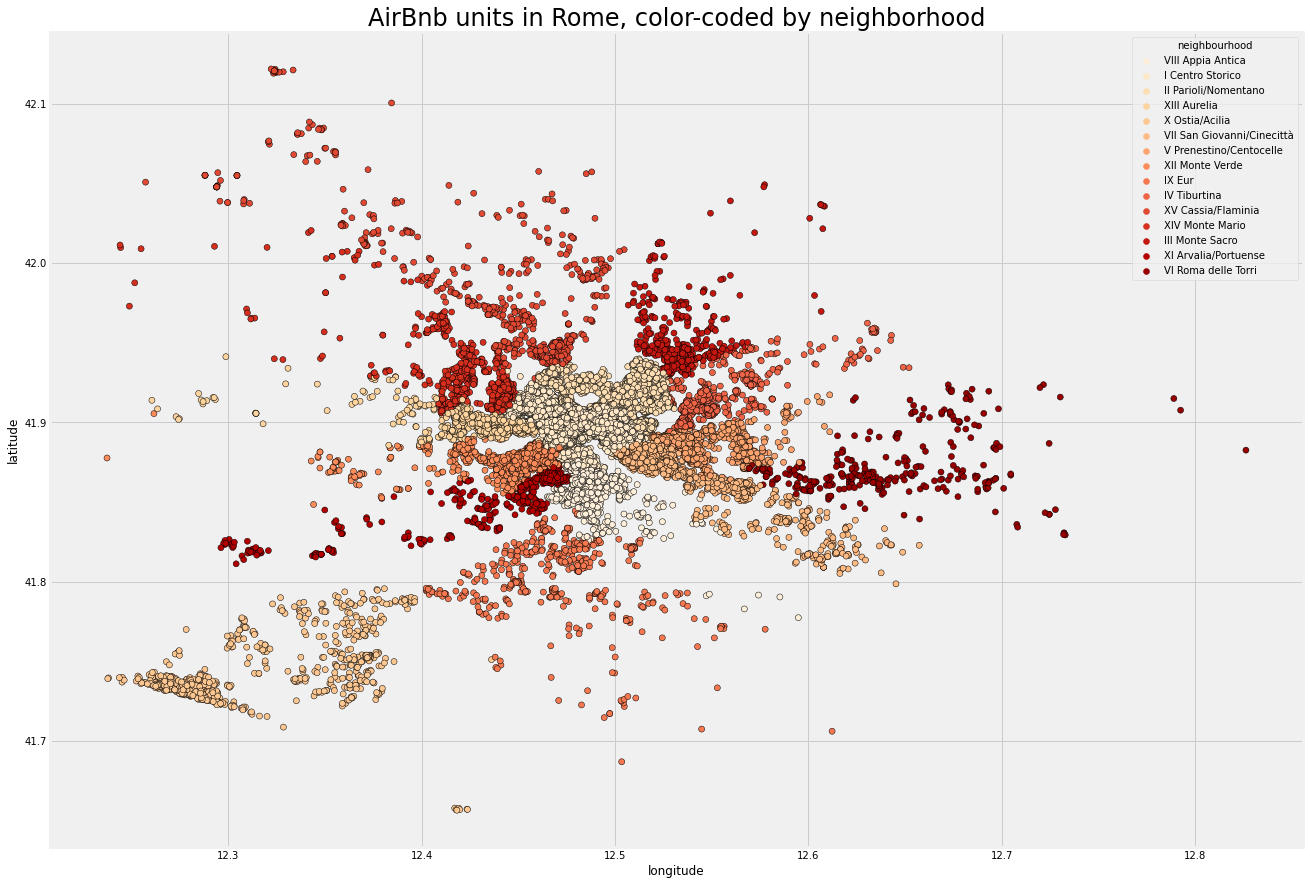

In [11]:
title = 'AirBnb units in Rome, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_rome_unique.longitude, master_df_rome_unique.latitude, hue = master_df_rome_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_rome.png')
plt.show()

## Add review data through a join

In [12]:
df_reviews = pd.concat([rome_raw_df_10_6_2021,raw_df_rome],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,26,...,4.60,4.60,4.80,5.00,4.40,4.40,f,0.0,5.0,0.0
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.888240,12.469530,Private room,86,...,4.26,4.67,4.59,4.70,4.74,4.48,f,0.0,3.0,0.0
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.895000,12.491170,Entire home/apt,100,...,4.32,4.58,4.68,4.84,4.79,4.37,f,7.0,0.0,0.0
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.896500,12.492110,Entire home/apt,90,...,4.76,4.87,4.97,4.91,4.98,4.68,f,1.0,0.0,0.0
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.925820,12.469280,Entire home/apt,63,...,4.85,4.90,4.95,5.00,4.85,4.85,f,1.0,1.0,0.0
5,14181,Beautiful apt close to the Vatican,51913,Ivan,NaN,I Centro Storico,41.913530,12.453700,Private room,187,...,4.83,4.83,4.96,4.87,4.57,4.74,f,0.0,1.0,0.0
6,15409,VATICAN SAN PIETRO 5min From Vatican,60352,Manuel,NaN,XIII Aurelia,41.896990,12.448080,Entire home/apt,100,...,4.00,5.00,4.50,5.00,4.50,4.50,f,1.0,2.0,0.0
7,16276,B&B Calisto6 great location in Rome,3280,Andrea,NaN,I Centro Storico,41.890070,12.471220,Private room,86,...,4.25,4.75,5.00,5.00,5.00,4.50,f,0.0,3.0,0.0
8,19965,*BRIGHT IN FRONT OF THE VATICAN CITY TWO BDR*,75450,Sasa,NaN,I Centro Storico,41.907300,12.453490,Entire home/apt,70,...,4.53,4.35,4.76,4.85,4.84,4.55,t,9.0,0.0,0.0
9,19967,A 5 MIN A PIEDI P.ZZA S. PIETRO 2 CAMERE LUMINOSO,75450,Sasa,NaN,I Centro Storico,41.909200,12.453440,Entire home/apt,68,...,4.16,3.88,4.78,4.74,4.81,4.22,t,9.0,0.0,0.0


## Regression

In [13]:
#df_reviews_.columns

In [14]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [15]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -123.68581608597441
Coefficients:  [ 17.89120627  42.05584601  -9.18960986   0.41393953   2.49059523
 -15.06378546  16.79239997  53.58814653 -31.7734401 ]
LinearRegression()


In [16]:
y_pred2 = regr.predict(X_)

In [17]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
21300,400,51.941832,-348.058168
2435,400,61.647037,-338.352963
20042,400,65.942804,-334.057196
21071,400,71.074857,-328.925143
10983,360,32.385204,-327.614796


<function matplotlib.pyplot.ylim(*args, **kwargs)>

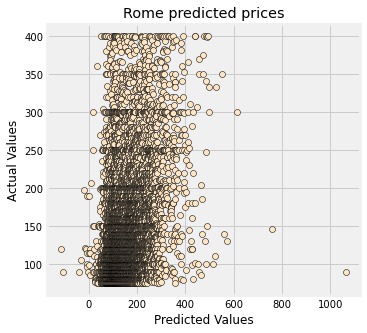

In [18]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Rome predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim